In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
#loading the dataset
anime_data = pd.read_csv('../DATA/Anime_new_year.csv')

In [6]:
anime_data.head(2)

,anime_id,title,genres,synopsis,anime_type,producer,studio,rating,scored_by,popularity,members,num_of_episodes,anime_source,aired,Link
0,1,Cowboy Bebop,"['Action','Adventure','Comedy','Drama','SciFi'...","In the year 2071, humanity has colonized sever...",TV,['BandaiVisual'],Sunrise,8.81,363889.0,39.0,704490.0,26.0,Original,1998,https://myanimelist.net/anime/1/Cowboy_Bebop
1,5,Cowboy Bebop Tengoku no Tobira,"['Action','Space','Drama','Mystery','SciFi']","Another day, another bountysuch is the life of...",Movie,"['Sunrise','BandaiVisual']",Bones,8.41,111187.0,475.0,179899.0,1.0,Original,2001,https://myanimelist.net/anime/5/Cowboy_Bebop__...


In [9]:
#droping the columns that won't be used
anime_data = anime_data.drop(columns=['genres','synopsis','anime_type','producer','studio','num_of_episodes','anime_source','Link'])
anime_data.head(2)

,anime_id,title,rating,scored_by,popularity,members,aired
0,1,Cowboy Bebop,8.81,363889.0,39.0,704490.0,1998
1,5,Cowboy Bebop Tengoku no Tobira,8.41,111187.0,475.0,179899.0,2001


In [10]:
#shape of the data
anime_data.shape

(14918, 7)

In [11]:
#checking the data type f each column
anime_data.dtypes

anime_id        int64
title          object
rating        float64
scored_by     float64
popularity    float64
members       float64
aired           int64
dtype: object

In [12]:
#checking for null values
anime_data.isnull().sum()

anime_id         0
title            1
rating        1835
scored_by     3008
popularity       0
members          0
aired            0
dtype: int64

In [13]:
#dropping the null values
anime_data.dropna(how = 'any', inplace = True)

In [14]:
#checking the shape after dropping the null values
anime_data.shape

(11823, 7)

In [15]:
#checking out the aired column
anime_data['aired'].head(12)

0     1998
1     2001
2     1998
3     2002
4     2004
5     2005
6     2005
7     2002
8     2004
9     2004
10    2002
11    1999
Name: aired, dtype: int64

In [18]:
#checking the number of animes aired on the same day
b = anime_data.groupby('aired')['title'].count()
b.tail(10)

aired
2010    379
2011    494
2012    486
2013    593
2014    692
2015    660
2016    768
2017    741
2018    316
2019     33
Name: title, dtype: int64

In [20]:
#getting the unique years in the aired column
def unique_year(x):
    unique = []
    for i in x:
        if i not in unique:
            unique.append(i)
    return unique

In [21]:
b = unique_year(anime_data['aired'])
len(b)

98

As you can see from the unique values there are empty list, so they have to be removed. That is why unique() attribute could not be used to get the unique values

In [22]:
#rows without release dates
anime_data[anime_data['aired']== '[]']

/home/dare/.virtualenvs/cv/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,anime_id,title,rating,scored_by,popularity,members,aired


In [36]:
#getting rid of rows without dates
anime_data = anime_data[anime_data['aired'] != '[]']

In [23]:
#converting the type of aired column to int
anime_data['aired'] = anime_data['aired'].astype('int')

In [24]:
anime_data.dtypes

anime_id        int64
title          object
rating        float64
scored_by     float64
popularity    float64
members       float64
aired           int64
dtype: object

In [25]:
#viewing the data
anime_data.head(3)

,anime_id,title,rating,scored_by,popularity,members,aired
0,1,Cowboy Bebop,8.81,363889.0,39.0,704490.0,1998
1,5,Cowboy Bebop Tengoku no Tobira,8.41,111187.0,475.0,179899.0,2001
2,6,Trigun,8.31,197451.0,158.0,372709.0,1998


In [26]:
#checking the new shape of the data
anime_data.shape

(11823, 7)

In [27]:
#a dataframe for the count of unique years
year_count = pd.DataFrame(anime_data.groupby('aired')['aired'].count())
year_count.rename(columns = {'aired':'count'}, inplace =True)
year_count = year_count.reset_index()
year_count.tail()

,aired,count
93,2015,660
94,2016,768
95,2017,741
96,2018,316
97,2019,33


#  Calculating the weighted average of each anime in our data

Using the Weighted Average Formula AND the members column based on popularity
WR = (RV + Cm/V+m) where:
- V is the number of votes
- m is minimum votes required to be listed
- R is rating average of the anime
- C is mean vote across whole report

In [28]:
#finding the weighted average for each anime
V = anime_data['scored_by']                       #number of votes for each anime
R = anime_data['rating']                     #average voting rating for each anime
C = anime_data['rating'].mean()              #mean vote across the whole report
m = anime_data['scored_by'].quantile(0.80)        #minimum votes requires to be among the top 

anime_data['weighted_avg'] = ((R*V)+(C*m))/(V+m)     #used by imdb to calculate weighted average of movies

In [29]:
anime_data.head(2)

,anime_id,title,rating,scored_by,popularity,members,aired,weighted_avg
0,1,Cowboy Bebop,8.81,363889.0,39.0,704490.0,1998,8.751886
1,5,Cowboy Bebop Tengoku no Tobira,8.41,111187.0,475.0,179899.0,2001,8.257816


In [30]:
#showing the top 10 anime with the highest weighted average
total_anime = anime_data.copy()
wavg = total_anime.sort_values('weighted_avg', ascending = False)
wavg.head()

,anime_id,title,rating,scored_by,popularity,members,aired,weighted_avg
3133,5114,Fullmetal Alchemist Brotherhood,9.25,730784.0,4.0,1194518.0,2009,9.215634
9029,32281,Kimi no Na wa.,9.19,467437.0,15.0,724490.0,2016,9.137699
4348,9253,Steins;Gate,9.14,561405.0,7.0,1005781.0,2011,9.097073
4967,11061,Hunter x Hunter 2011,9.11,400879.0,20.0,716409.0,2011,9.050869
7716,28851,Koe no Katachi,9.04,293169.0,53.0,507502.0,2016,8.961744


# Recommending Anime according to the best in their year group using the combination of weighted average ratings, members and popularity

In [31]:
#normalizing the weighted average and popularity column

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

### Defining all the functions that will help with this recommendation

In [32]:
#function to create group dataframes 
def create_group(first,last):
    group = pd.DataFrame(anime_data.loc[(anime_data['aired'] >= first) & (anime_data['aired'] <= last)])
    #changing the index to allow for easy joining of the dataframes later
    group.index = [x for x in range(group.shape[0])]
    return group

In [33]:
#function to normalize the weighted average, popularity and membrs
def norm(group):
    data_scaled = min_max_scaler.fit_transform(group[['weighted_avg','popularity','members']])
    data_norm = pd.DataFrame(data_scaled, columns = ['weighted_avg','popularity','members'])
    return data_norm

In [54]:
#function to create a score value that splits scaled weighted_avg, popularity and members
def create_score(group,data_norm):
    group[['norm_weighted_avg','norm_popularity','norm_members']] = data_norm
    group['score'] = group['norm_weighted_avg']*0.8 +group['norm_popularity']*0.1 + group['norm_members']*0.1
    data_scored = group.sort_values(['score'], ascending=False)
    return data_scored

In [55]:
#a function to show normalized features and the new score  feature
def show_normalized(data):
    return data[['title','norm_weighted_avg','norm_popularity','norm_members','score']].head(10)

In [56]:
#a function to plot the top anime according to a split between weighted avg, members and popularity
def plot(data,first,last):
    plt.figure(figsize=(18,8))

    ax = sns.barplot(x = data['score'].head(10), y = data['title'].head(10), data = data, palette='Set2')


    plt.title('Best anime between years {} and {}'.format (first,last), weight = 'bold')
    plt.xlabel('Score', weight = 'bold')
    plt.ylabel('Anime Title', weight = 'bold')

#plt.savefig('scored.png')

### Group1 recommendation (1900 to 1999)

In [57]:
group_1 = create_group(1900,1999)
group_1.head(2)

,anime_id,title,rating,scored_by,popularity,members,aired,weighted_avg
0,1,Cowboy Bebop,8.81,363889.0,39.0,704490.0,1998,8.751886
1,6,Trigun,8.31,197451.0,158.0,372709.0,1998,8.225695


In [58]:
data_norm_1 = norm(group_1)

In [59]:
data_scored_1 = create_score(group_1,data_norm_1)

In [62]:
res = show_normalized(data_scored_1)
print(res['title'])

0                                           Cowboy Bebop
48                                         Mononoke Hime
2                                              One Piece
66                                 Great Teacher Onizuka
8      Rurouni Kenshin Meiji Kenkaku Romantan  Tsuiok...
3                                Neon Genesis Evangelion
128                                     Tonari no Totoro
152                                       Hotaru no Haka
5          Neon Genesis Evangelion The End of Evangelion
6                                   Kenpuu Denki Berserk
Name: title, dtype: object


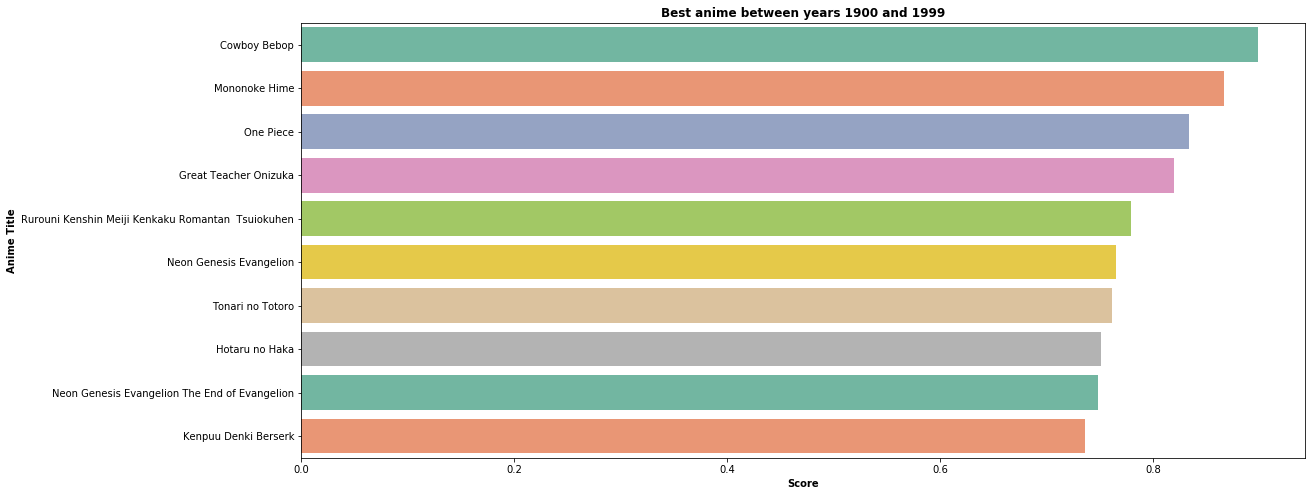

In [44]:
plot(data_scored_1,1900,1999)

### Group2 recommendation (2000 to 2009)

In [63]:
group_2 = create_group(2000,2009)
group_2.head(2)

,anime_id,title,rating,scored_by,popularity,members,aired,weighted_avg
0,5,Cowboy Bebop Tengoku no Tobira,8.41,111187.0,475.0,179899.0,2001,8.257816
1,7,Witch Hunter Robin,7.34,31875.0,1278.0,74889.0,2002,7.115654


In [64]:
data_norm_2 = norm(group_2)

In [65]:
data_scored_2 = create_score(group_2,data_norm_2)

In [67]:
res = show_normalized(data_scored_2)
print(res)

                                  title  norm_weighted_avg  norm_popularity  \
1629    Fullmetal Alchemist Brotherhood           1.000000         0.000184   
696                          Death Note           0.903378         0.000000   
1177  Code Geass Hangyaku no Lelouch R2           0.947551         0.001598   
1476                Clannad After Story           0.954132         0.003872   
716      Code Geass Hangyaku no Lelouch           0.921528         0.000615   
129       Sen to Chihiro no Kamikakushi           0.941882         0.002397   
934          Tengen Toppa Gurren Lagann           0.910906         0.001721   
475                             Gintama           0.938268         0.005900   
263                 Howl no Ugoku Shiro           0.906589         0.005347   
1490                           Toradora           0.853543         0.000799   

      norm_members     score  
1629      0.822835  0.882302  
696       1.000000  0.822703  
1177      0.543387  0.812539  
1476  

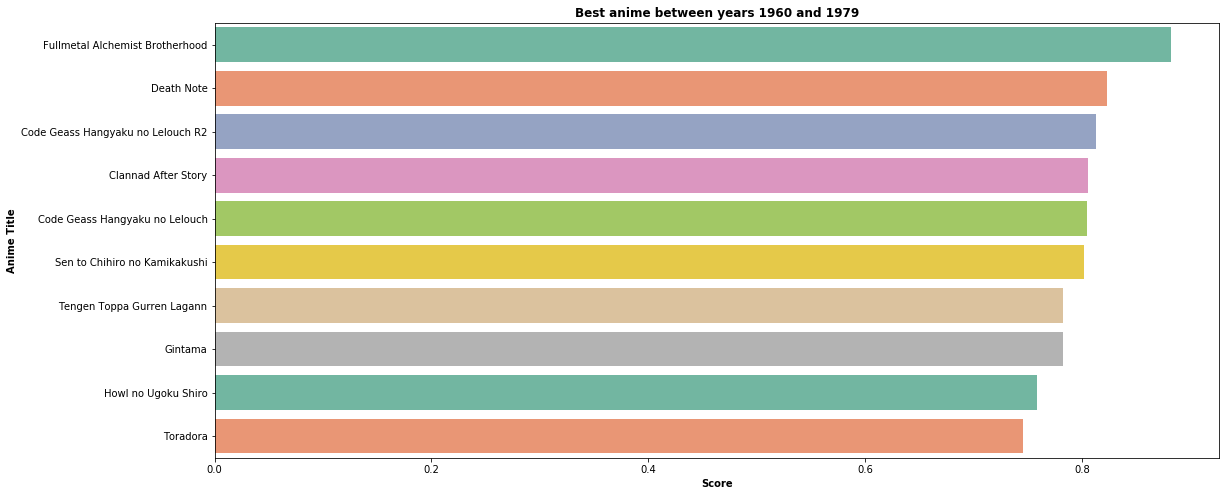

In [49]:
plot(data_scored_2,1960,1979)

### Group3 recommendation (2010 to 2019)

In [68]:
group_3 = create_group(2010,2019)
group_3.head(2)

,anime_id,title,rating,scored_by,popularity,members,aired,weighted_avg
0,4106,Trigun Badlands Rumble,8.05,46942.0,1117.0,84011.0,2010,7.777128
1,4713,Heart no Kuni no Alice Wonderful Wonder World,6.23,7822.0,2797.0,23507.0,2011,6.255933


In [69]:
data_norm_3 = norm(group_3)

In [70]:
data_scored_3 = create_score(group_3,data_norm_3)

In [71]:
res = show_normalized(data_scored_3)
print(res)

                                                  title  norm_weighted_avg  \
228                                         Steins;Gate           0.991996   
2941                                     Kimi no Na wa.           1.000000   
579                                Hunter x Hunter 2011           0.982894   
2132                                     Koe no Katachi           0.965336   
2354                                      One Punch Man           0.913754   
1657                            Shigatsu wa Kimi no Uso           0.938801   
984                                  Shingeki no Kyojin           0.868462   
334                                             Gintama           0.946951   
3188  Haikyuu Karasuno Koukou vs. Shiratorizawa Gaku...           0.943365   
3404                   Boku no Hero Academia 2nd Season           0.913789   

      norm_popularity  norm_members     score  
228          0.000307      0.750222  0.868650  
2941         0.000798      0.540403  0.854120

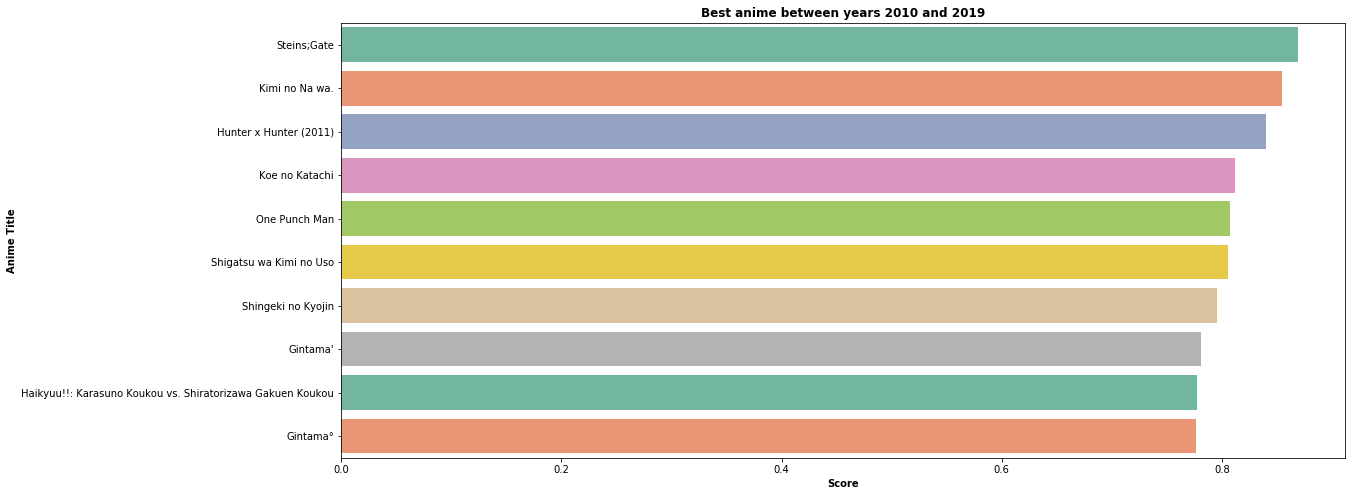

In [65]:
plot(data_scored_3,2010,2019)